# Results Analysis

This is a notebook that will be focused on ensuring the accuracy of our results as well as completing any final analyses we need.

## Final Analyses

First we need to create one last graph to see the overall most popular ships since that seems to have been forgotten. This way we can look and see if there are any popular tropes that can affect the popularity of a ship or fandom.

In [1]:
#import statements
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
#load in data
with open("../ao3bot/pop_fandoms_stats.json", "r") as f:
    temp_list = json.load(f)

In [3]:
df = pd.read_json('../ao3bot/pop_fandoms_stats.json')

In [4]:
df.head()

,fandom,total_works,ratings,warnings,categories,fandoms,characters,relationships,freeforms
0,僕のヒーローアカデミア | Boku no Hero Academia | My Hero ...,205105,"{'Teen And Up Audiences': '72662', 'General Au...","{'No Archive Warnings Apply': '100856', 'Creat...","{'M/M': '110358', 'F/M': '50314', 'Gen': '4070...",{'僕のヒーローアカデミア | Boku no Hero Academia | My Her...,"{'Midoriya Izuku': '105193', 'Bakugou Katsuki'...","{'Bakugou Katsuki/Midoriya Izuku': '27917', 'B...","{'Fluff': '37356', 'Angst': '26229', 'Bakugou ..."
1,Haikyuu!!,125858,"{'General Audiences': '42277', 'Teen And Up Au...","{'No Archive Warnings Apply': '76013', 'Creato...","{'M/M': '100926', 'F/M': '14863', 'Gen': '1154...","{'Haikyuu!!': '125858', '僕のヒーローアカデミア | Boku no...","{'Hinata Shouyou': '34110', 'Oikawa Tooru': '3...","{'Iwaizumi Hajime/Oikawa Tooru': '17267', 'Hin...","{'Fluff': '34155', 'Angst': '16018', 'Establis..."
2,Naruto,81515,"{'Teen And Up Audiences': '26331', 'General Au...","{'No Archive Warnings Apply': '41377', 'Creato...","{'M/M': '38025', 'F/M': '27278', 'Gen': '17835...","{'Naruto': '80881', 'Boruto: Naruto Next Gener...","{'Uzumaki Naruto': '30469', 'Hatake Kakashi': ...","{'Uchiha Sasuke/Uzumaki Naruto': '10264', 'Hat...","{'Fluff': '8646', 'Alternate Universe - Canon ..."
3,Shingeki no Kyojin | Attack on Titan,63380,"{'Teen And Up Audiences': '18055', 'Explicit':...",{'Creator Chose Not To Use Archive Warnings': ...,"{'M/M': '37177', 'F/M': '19415', 'F/F': '6910'...",{'Shingeki no Kyojin | Attack on Titan': '6319...,"{'Levi Ackerman': '35915', 'Eren Yeager': '335...","{'Levi Ackerman/Eren Yeager': '15780', 'Levi A...",{'Alternate Universe - Modern Setting': '11022...
4,Miraculous Ladybug,48526,"{'General Audiences': '21597', 'Teen And Up Au...","{'No Archive Warnings Apply': '30296', 'Creato...","{'F/M': '33408', 'Gen': '8446', 'F/F': '4124',...","{'Miraculous Ladybug': '48526', 'Batman - All ...","{'Marinette Dupain-Cheng | Ladybug': '40087', ...",{'Adrien Agreste | Chat Noir/Marinette Dupain-...,"{'Fluff': '10478', 'Identity Reveal': '6393', ..."


In [21]:
'''
First we need to get the data into a form we can use in a bar chart.
'''
temp_ships = df["relationships"].tolist()
temp = []
temp_unformatted = []
for i in range(len(temp_ships)):
    for key in temp_ships[i].keys():
        if key not in temp_unformatted:
            if "&" not in key:
                temp.append({"Relationship": key, "Count": temp_ships[i][key]})
                temp_unformatted.append(key)

#Now that we have a dictionary of fandoms that are crossed-over, we can put this into a dataframe.
ships = pd.DataFrame(temp)
ships['Count'] = pd.to_numeric(ships['Count'])
ships_nums = ships[["Count"]]
ships[["Count"]] = (ships_nums-ships_nums.min())/(ships_nums.max()-ships_nums.min())
ships


,Relationship,Count
0,Bakugou Katsuki/Midoriya Izuku,0.280374
1,Bakugou Katsuki/Kirishima Eijirou,0.245664
2,Midoriya Izuku/Todoroki Shouto,0.199655
3,Aizawa Shouta | Eraserhead/Yamada Hizashi | Pr...,0.143351
4,Bakugou Katsuki/Todoroki Shouto,0.081423
...,...,...
243,Emet-Selch/Warrior of Light (Final Fantasy XIV),0.014222
244,Gladiolus Amicitia/Prompto Argentum,0.013810
245,Taylor Swift/Adam Young,0.000000
246,Jet Black/Spike Spiegel,0.000010


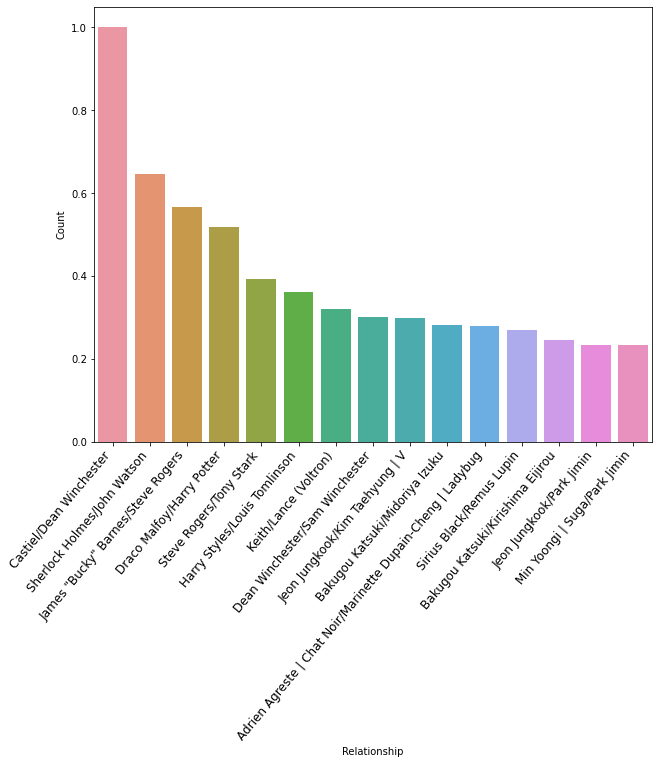

In [22]:
'''
Plot the ships
'''
ships_sorted = ships.sort_values('Count', ascending = False)
ships_subset = ships_sorted[:15]
plt.figure(figsize=(10,8))

ax = sns.barplot(x="Relationship", y="Count", data=ships_subset)
plt.xticks(
    rotation=50, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()